In [241]:
import pandas as pd
import numpy as np

In [242]:
import os

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [245]:
df = pd.DataFrame(columns = ['time'])


In [246]:
df['time'] = pd.to_datetime(df['time'])

In [247]:
dataframes = []

In [248]:
directory = '/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv'
for file in os.listdir(directory):
    if file.endswith('.csv'):
        temp = file[:-4]
        filepath = os.path.join(directory, file)
        temp = pd.read_csv(filepath)
        dataframes.append(temp)

        
        

In [249]:
# Concatenate all dataframes
df2 = pd.concat(dataframes)

# Convert 'time' column to datetime if it's not already
df2['time'] = pd.to_datetime(df2['time'])

# Group by 'time' and sum 'electric-combined', get first non-null value for other columns
grouped = df2.groupby('time')
result2 = grouped.agg({col: 'mean' for col in df2.columns if col != 'electric-combined'})
result2['weather_code (wmo code)'] = grouped['weather_code (wmo code)'].apply(lambda x: x.mode()[0]).values
result2['electric-combined'] = grouped['electric-combined'].sum().values
# Reset index
result2 = result2.reset_index(drop=True)

In [250]:
display(result2.head())

,time,hot-water-hot-pipe,central-heating-flow,central-heating-return,gas,hot-water-cold-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),...,freezer,utility-room-sockets,dehumidifier,electricoven,sockets2,sockets1,oven,water-heater,induction-hob,electric-combined
0,2016-08-10 14:00:00,67257.0,32734.0,32850.0,0.0,65220.0,12.6,79.0,51,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.16
1,2016-08-10 15:00:00,66100.0,5720.0,5720.0,0.0,64490.0,12.7,81.0,51,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.42
2,2016-08-10 16:00:00,65445.0,0.0,0.0,0.0,64495.0,12.6,85.0,51,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.97
3,2016-08-10 17:00:00,66967.0,0.0,0.0,0.0,66020.0,12.5,90.0,51,16.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.25
4,2016-08-10 18:00:00,65003.0,0.0,0.0,0.0,63710.0,12.7,94.0,53,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.12


In [251]:
result2 = result2[['time','temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined']]

In [252]:
result2.sample(20)

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined
433,2016-08-28 15:00:00.000000000,16.700000,78.000000,1,3.800000,41.000000,6.0,15.0,74.01
12311,2018-01-05 13:00:00.000000000,3.667568,96.216216,51,10.898919,33.708108,4.0,13.0,12625.00
12832,2018-01-27 06:00:00.000000000,7.032984,85.424084,51,31.011518,195.345550,5.0,6.0,3067.66
13860,2018-03-11 01:59:59.999999744,4.190000,98.100000,3,3.264286,324.938095,6.0,2.0,8146.99
5147,2017-03-13 01:00:00.000000000,5.509756,87.000000,0,18.600000,234.000000,0.0,1.0,1119.12
4503,2017-02-14 05:00:00.000000000,3.900000,90.000000,0,16.900000,74.000000,1.0,5.0,773.18
8820,2017-08-13 02:00:00.000000000,10.046067,81.483146,0,14.633708,255.292135,6.0,2.0,2707.12
14639,2018-04-12 13:00:00.000000000,6.026009,81.775785,3,24.921973,58.896861,3.0,13.0,14650.80
14071,2018-03-19 21:00:00.000000000,1.588837,76.013953,3,8.837209,311.572093,0.0,21.0,18140.29
12803,2018-01-26 01:00:00.000000000,2.577487,92.246073,2,4.926702,301.183246,4.0,1.0,7160.43


Autocorrelation:  0.9374010457810853


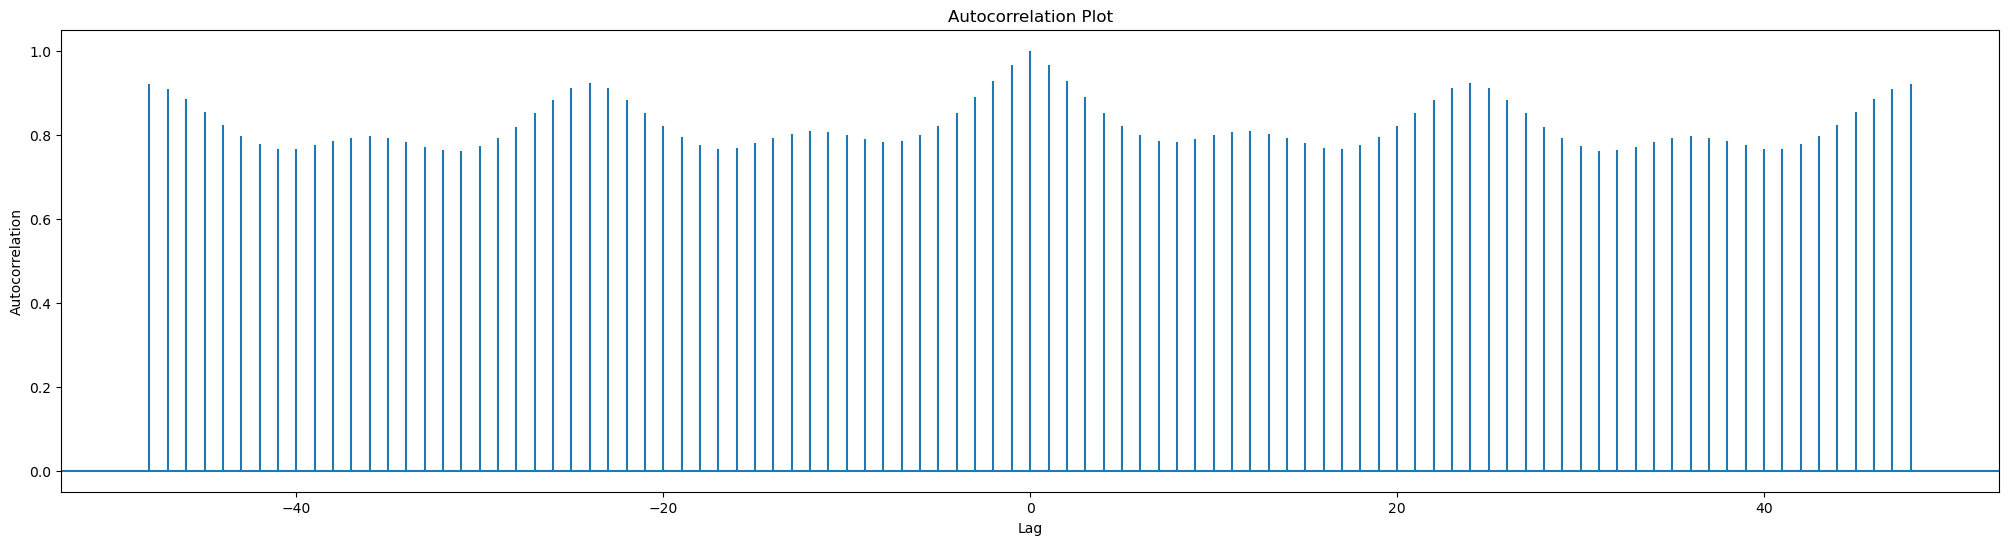

In [253]:
# Assuming 'result2' is your DataFrame and 'electric-combined' is the electric-combined you want to plot
autocorrelation = result2['electric-combined'].autocorr()

print('Autocorrelation: ', autocorrelation)
plt.subplots(1,1,figsize= (25,6))
plt.acorr(result2['electric-combined'], maxlags=48)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
#plt.xticks(range(-40, 41))
plt.ylabel('Autocorrelation')
plt.show()

there is a real high correlation at -1 and -25 and + 24

In [254]:
df = result2.copy()

In [255]:
df['electric-combined-next-hour'] = df['electric-combined'].shift(-1)

In [256]:
df['electric-combined-yesterday'] = df['electric-combined'].shift(24)

In [257]:
df['electric-combined-last-week'] = df['electric-combined'].shift(168)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16546 entries, 0 to 16545
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         16546 non-null  datetime64[ns]
 1   temperature_2m (°C)          16546 non-null  float64       
 2   relative_humidity_2m (%)     16546 non-null  float64       
 3   weather_code (wmo code)      16546 non-null  int64         
 4   wind_speed_10m (km/h)        16546 non-null  float64       
 5   wind_direction_10m (°)       16546 non-null  float64       
 6   day                          16546 non-null  float64       
 7   hour                         16546 non-null  float64       
 8   electric-combined            16546 non-null  float64       
 9   electric-combined-next-hour  16545 non-null  float64       
 10  electric-combined-yesterday  16522 non-null  float64       
 11  electric-combined-last-week  16378 non-nu

lets comptue the Vif

In [259]:
df.columns

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-next-hour', 'electric-combined-yesterday',
       'electric-combined-last-week'],
      dtype='object')

In [260]:
def compute_vif(df):
    columns_desired = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-next-hour', 'electric-combined-last-week',
       'electric-combined-yesterday']
    df = df[columns_desired]
    #make a deep copy of df
    df_copy = df.copy(deep=True)
    scaler = StandardScaler()
    scaler.fit(df_copy)
    df_copy = scaler.transform(df_copy)

    
    # Convert df_copy back to a DataFrame and assign column names
    df_copy = pd.DataFrame(df_copy, columns=df.columns)
    
    df_copy['intercept'] = 1
    #display(df_copy.head())
    vif = pd.DataFrame()
    vif["variable"] = df_copy.columns

   # Replace `nan` values with a specific value (like 0)
    df_copy = df_copy.fillna(0)

   # Replace `inf` values with a large finite number
    df_copy = df_copy.replace([np.inf, -np.inf], np.finfo(np.float64).max)
   
    vif['vif'] = [variance_inflation_factor(df_copy.values, i) for i in list(range(df_copy.shape[1]))]
    vif = vif[vif['variable']!= 'intercept']
    print([vif.variable])
    return vif.sort_values(by='vif', ascending=True)

In [261]:
def corr_map(df):
    df_copy = df.copy(deep=True)

    df_copy = df_copy.drop('time', axis=1)
    corr = df_copy.corr()
    electric_corr = corr[['electric-combined-next-hour']].sort_values(by='electric-combined-next-hour', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(electric_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.show()


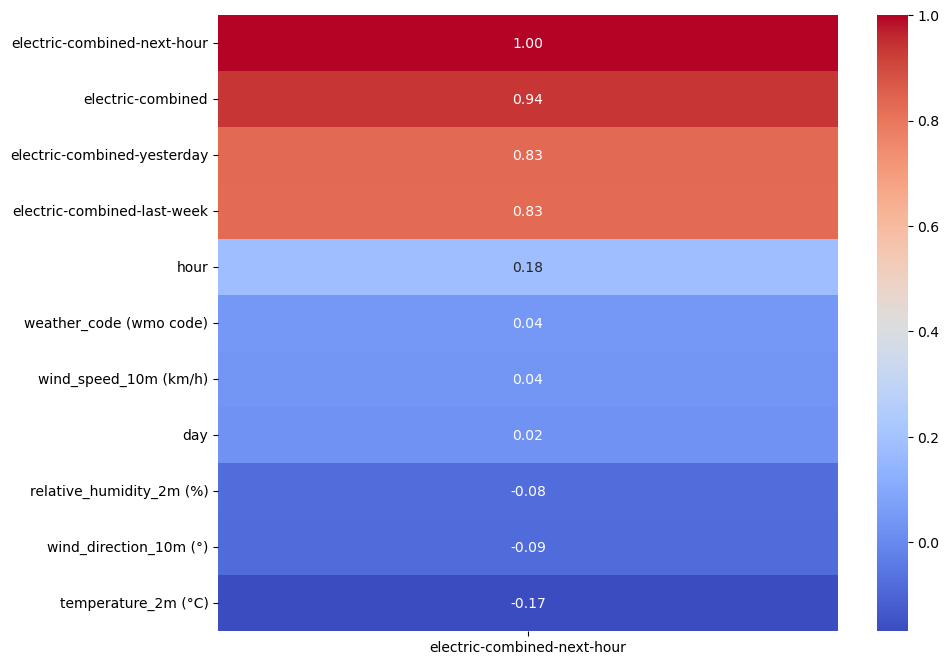

In [262]:
corr_map(df)

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


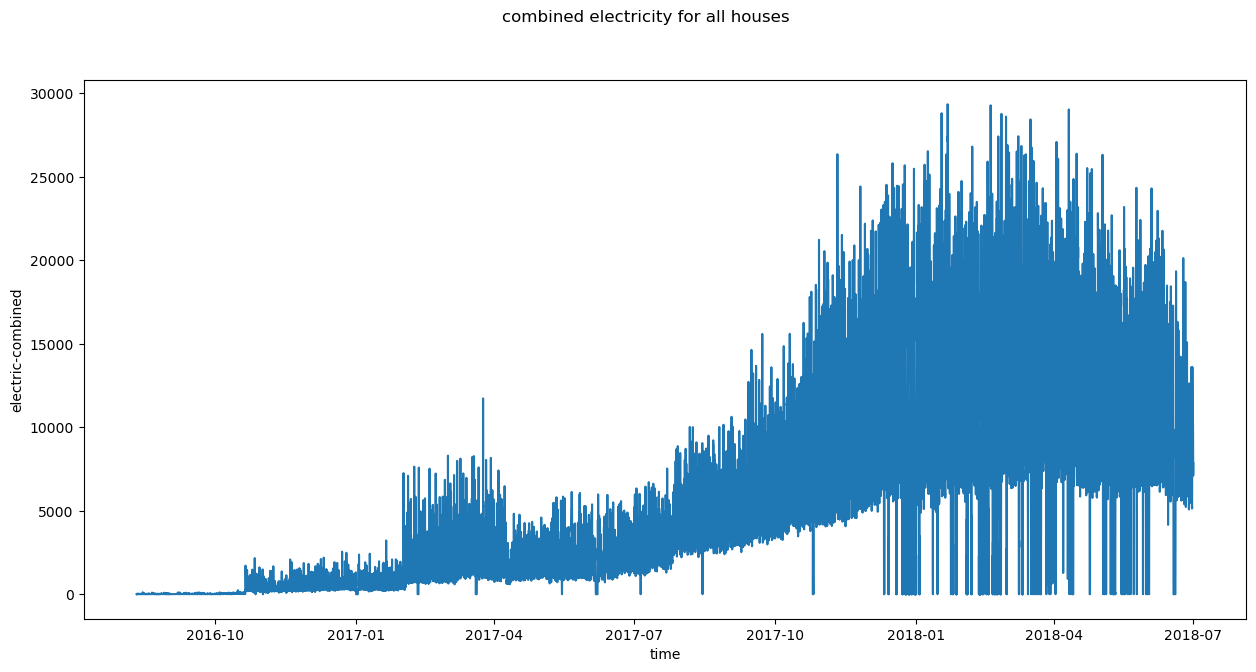

In [263]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [264]:
start_date = pd.to_datetime('2017-09-01')
end_date = pd.to_datetime('2018-03-01')
df = df[(df.time >= start_date) & (df.time < end_date)]

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


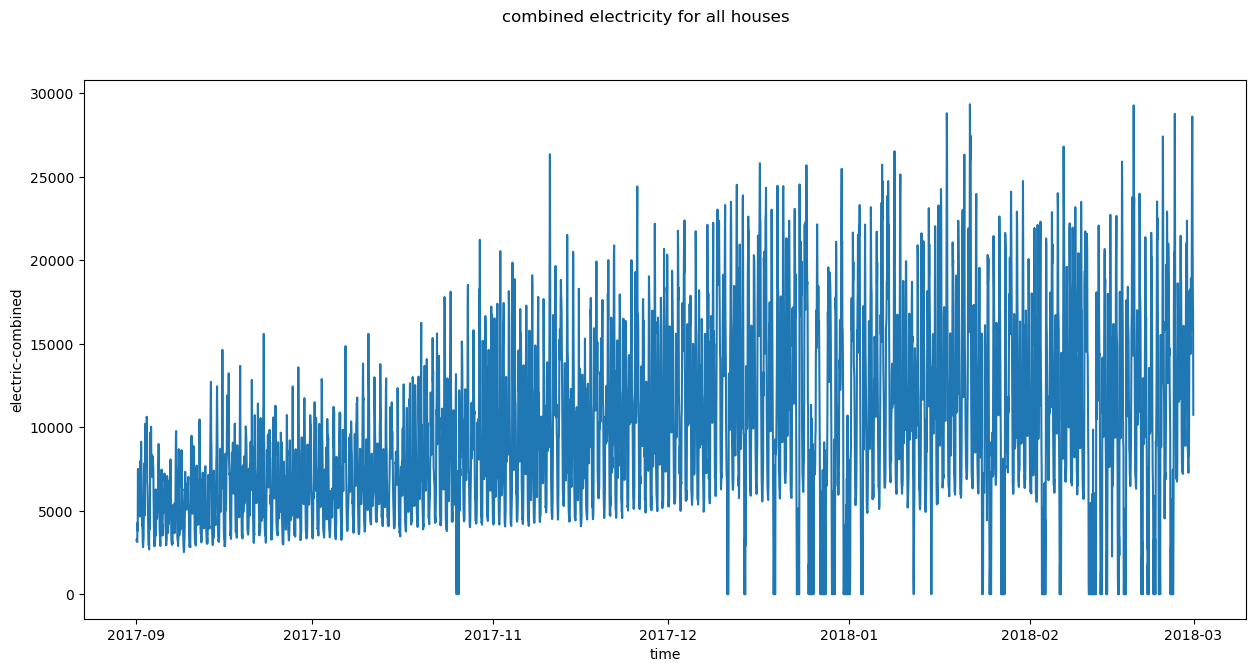

In [265]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

The significant drops are clearly errorneous

In [266]:
df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/3585158523.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


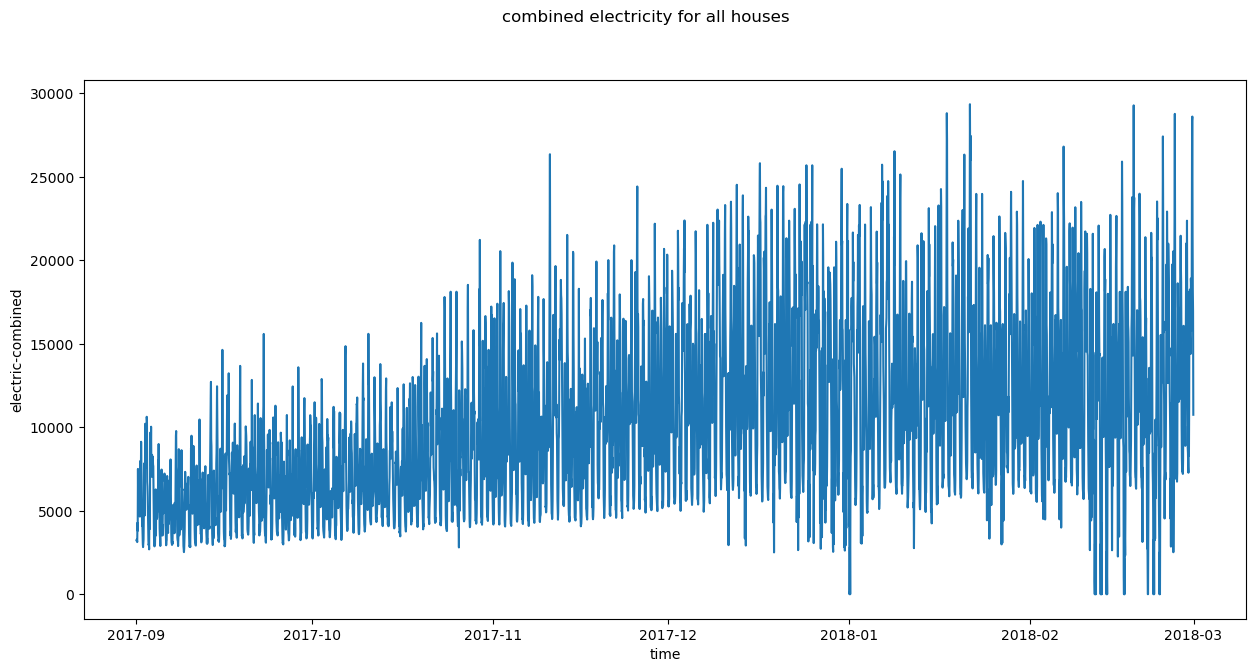

In [267]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [268]:
df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/3585158523.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


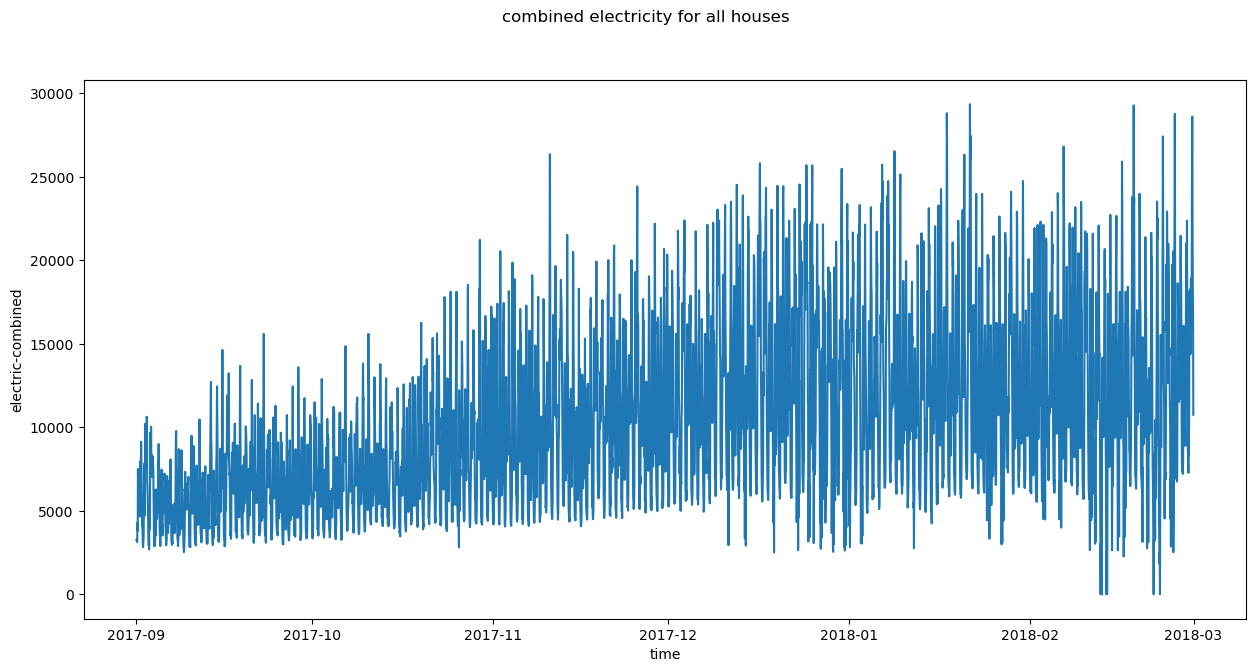

In [269]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [270]:
new_date = pd.to_datetime('2017-12-01')

In [271]:
df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(24)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2804422049.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


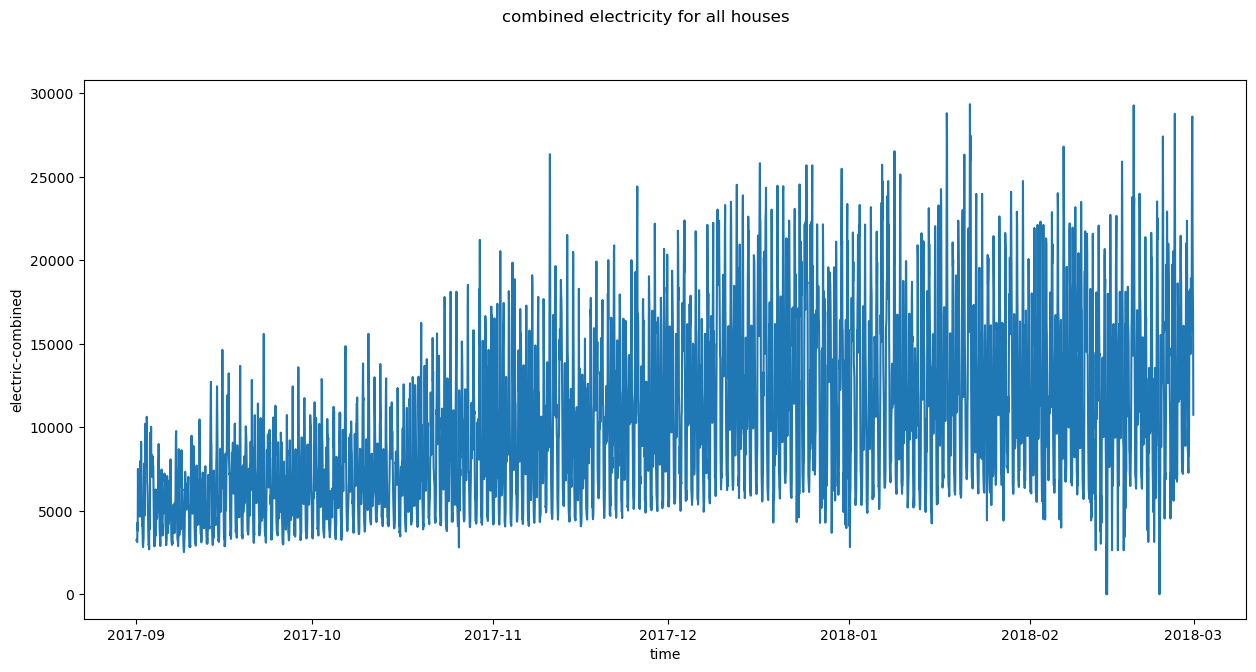

In [272]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [273]:
df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(24)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2804422049.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


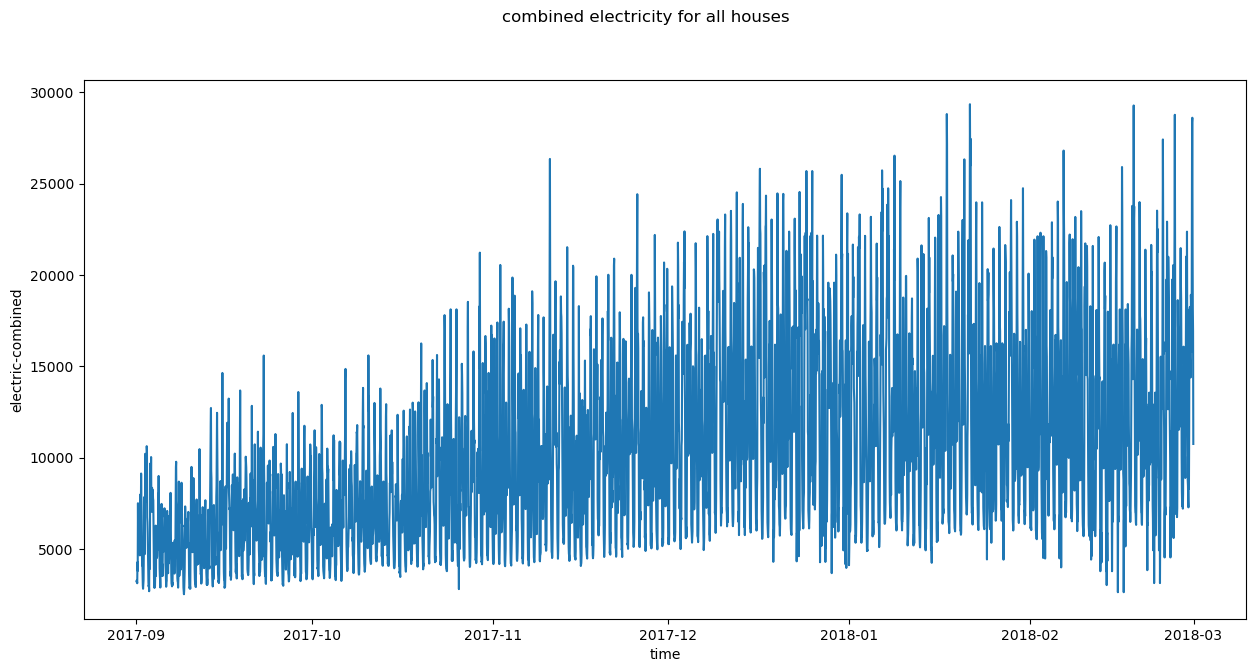

In [274]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

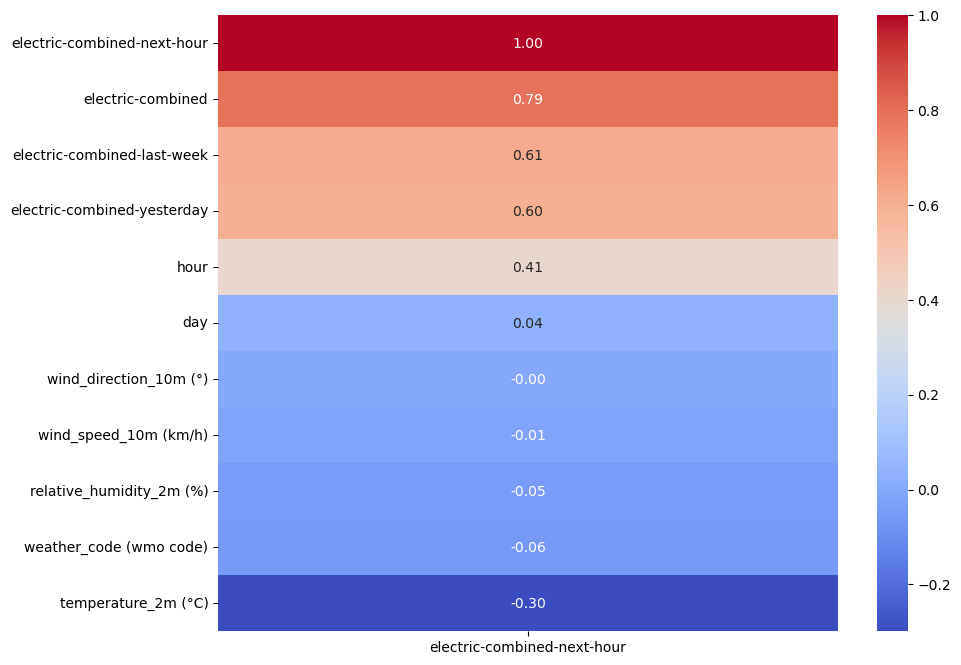

In [275]:
corr_map(df)

In [276]:
compute_vif(df)

[0             temperature_2m (°C)
1        relative_humidity_2m (%)
2         weather_code (wmo code)
3           wind_speed_10m (km/h)
4          wind_direction_10m (°)
5                             day
6                            hour
7               electric-combined
8     electric-combined-next-hour
9     electric-combined-last-week
10    electric-combined-yesterday
Name: variable, dtype: object]


,variable,vif
5,day,1.017966
4,wind_direction_10m (°),1.066633
2,weather_code (wmo code),1.157542
3,wind_speed_10m (km/h),1.230864
1,relative_humidity_2m (%),1.245452
0,temperature_2m (°C),1.422726
6,hour,1.649228
10,electric-combined-yesterday,2.539319
9,electric-combined-last-week,2.569299
8,electric-combined-next-hour,2.699656


In [277]:
df.time = df.time.dt.round('H')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15132/2685889922.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.time = df.time.dt.round('H')


In [278]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined,electric-combined-next-hour,electric-combined-yesterday,electric-combined-last-week
9274,2017-09-01 00:00:00,11.277551,86.653061,0,10.337755,250.520408,4.0,0.0,3225.60,3283.71,2916.20,3139.95
9275,2017-09-01 01:00:00,10.387755,90.377551,0,8.339796,257.448980,4.0,1.0,3283.71,3227.63,2760.51,2859.84
9276,2017-09-01 02:00:00,9.730612,91.377551,0,6.369388,253.959184,4.0,2.0,3227.63,3123.89,2851.56,3482.55
9277,2017-09-01 03:00:00,9.325510,91.510204,1,5.530612,235.867347,4.0,3.0,3123.89,4279.22,2659.65,3085.63
9278,2017-09-01 04:00:00,9.043878,92.510204,2,5.778571,237.806122,4.0,4.0,4279.22,3795.89,2686.68,2961.80


In [279]:
df.index

Index([ 9274,  9275,  9276,  9277,  9278,  9279,  9280,  9281,  9282,  9283,
       ...
       13608, 13609, 13610, 13611, 13612, 13613, 13614, 13615, 13616, 13617],
      dtype='int64', length=4344)

In [280]:
df.to_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

In [281]:
#df.index = df.time

In [282]:
#df= df.drop('time', axis = 1)

In [283]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined,electric-combined-next-hour,electric-combined-yesterday,electric-combined-last-week
9274,2017-09-01 00:00:00,11.277551,86.653061,0,10.337755,250.520408,4.0,0.0,3225.60,3283.71,2916.20,3139.95
9275,2017-09-01 01:00:00,10.387755,90.377551,0,8.339796,257.448980,4.0,1.0,3283.71,3227.63,2760.51,2859.84
9276,2017-09-01 02:00:00,9.730612,91.377551,0,6.369388,253.959184,4.0,2.0,3227.63,3123.89,2851.56,3482.55
9277,2017-09-01 03:00:00,9.325510,91.510204,1,5.530612,235.867347,4.0,3.0,3123.89,4279.22,2659.65,3085.63
9278,2017-09-01 04:00:00,9.043878,92.510204,2,5.778571,237.806122,4.0,4.0,4279.22,3795.89,2686.68,2961.80


In [284]:
popped = df.pop('electric-combined-next-hour')
df['electric-combined-next-hour'] = popped

In [285]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined,electric-combined-yesterday,electric-combined-last-week,electric-combined-next-hour
9274,2017-09-01 00:00:00,11.277551,86.653061,0,10.337755,250.520408,4.0,0.0,3225.60,2916.20,3139.95,3283.71
9275,2017-09-01 01:00:00,10.387755,90.377551,0,8.339796,257.448980,4.0,1.0,3283.71,2760.51,2859.84,3227.63
9276,2017-09-01 02:00:00,9.730612,91.377551,0,6.369388,253.959184,4.0,2.0,3227.63,2851.56,3482.55,3123.89
9277,2017-09-01 03:00:00,9.325510,91.510204,1,5.530612,235.867347,4.0,3.0,3123.89,2659.65,3085.63,4279.22
9278,2017-09-01 04:00:00,9.043878,92.510204,2,5.778571,237.806122,4.0,4.0,4279.22,2686.68,2961.80,3795.89


In [286]:
def forecast(df):
    df_copy = df.copy(deep=True)
    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week'
       ]
    df_copy.dropna(inplace=True)

    y = df_copy.pop('electric-combined-next-hour')


    X = df_copy[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=96, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    # org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

    
    # org_csv = org_csv['time']

    # plot_data['time'] = org_csv
    # plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
    #plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next hour prediciton with actuals over 7 days: community')

    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 3465.3355776486574
mean absolute percentage error: 2.2436440933252006e+18
R-squared error: 0.46211441589510505
______________


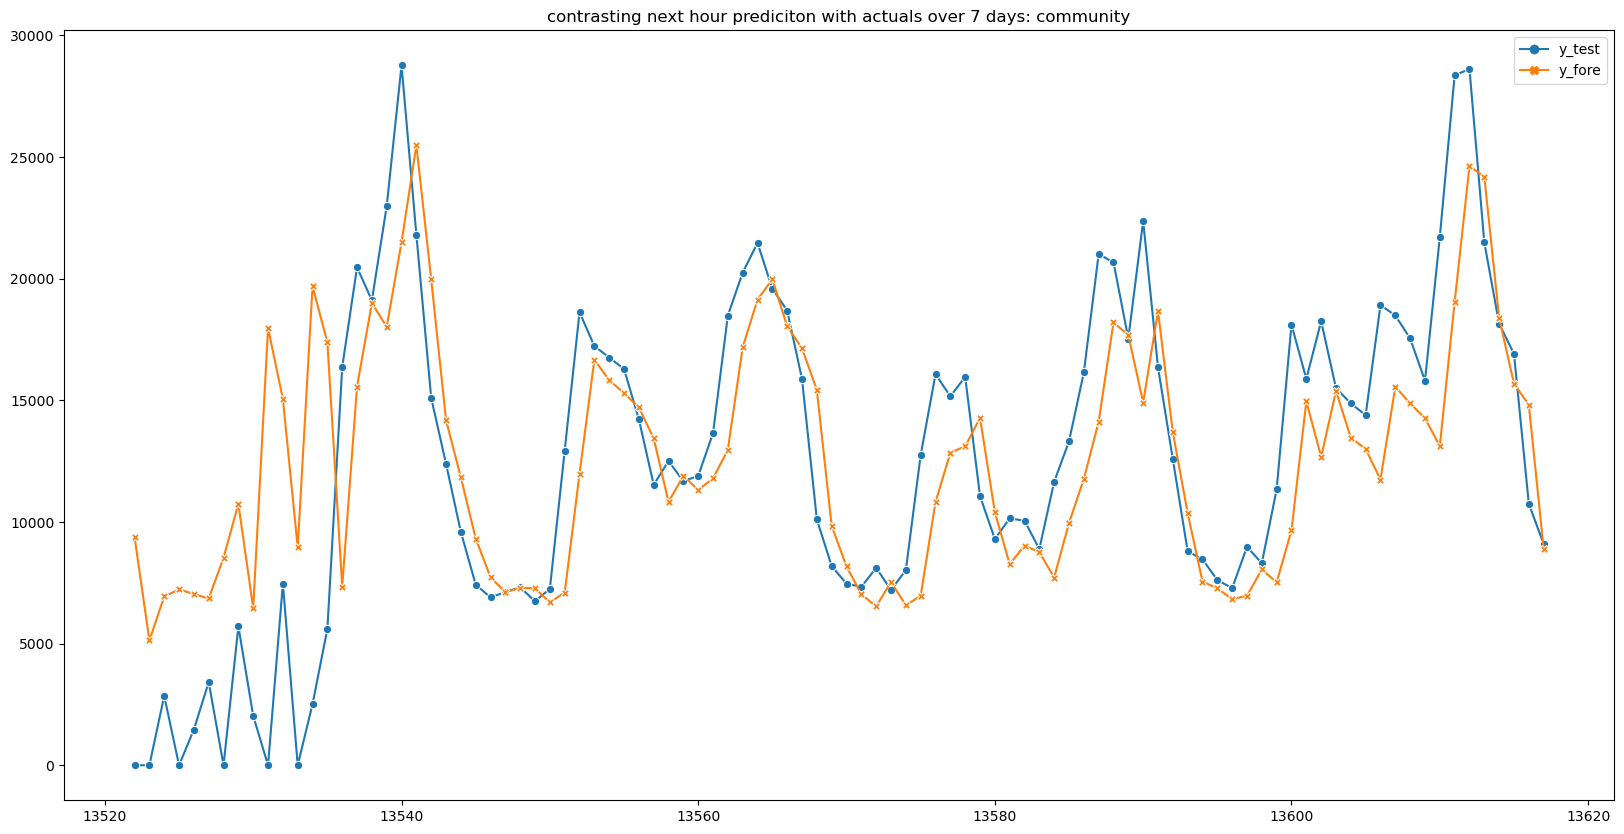

In [287]:
forecast(df)